In [26]:
import numpy as np

import GetUEFC
from opt_mO3 import opt_mO3

import importlib
importlib.reload(GetUEFC)

from scipy.optimize import minimize_scalar

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Question 1

In [57]:
# Specified D/B_max for Question 1
db_max_Q1 = 0.08

# Plane Vanilla parameters
c_r = 0.2
c_t = 0.1
b = 1.5
S = 0.5 * (c_r + c_t) * b # Calculate area as two trapezoids
AR = (b ** 2) / S

In [58]:
cl_des_max = 0.85
cl_des_min = 0.1
cl_des_values = 200

# Generate space for possible airframes and attempt to optimize mO3
cl_des_space = np.linspace(cl_des_min, cl_des_max, num=cl_des_values)
airframe_space = [GetUEFC.UEFC(dbmax=db_max_Q1, CLdes=cl_des_value)
                  for cl_des_value in cl_des_space]
airframe_optvars = [opt_mO3(airframe, AR, S) for airframe in airframe_space]

/usr/local/lib/python3.8/dist-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [60]:
# Find the min CL_des value that results in a successful optimization
min_feasible_idx = np.argmax([optvar[2] for optvar in airframe_optvars])

# Only consider feasible airframes
feasible_cl_des = cl_des_space[min_feasible_idx:-1]
feasible_airframes = airframe_space[min_feasible_idx:-1]
feasible_optvars = airframe_optvars[min_feasible_idx:-1]

In [70]:
m03 = [optvar[1] for optvar in feasible_optvars]
m_pay = [optvar[0][2] for optvar in feasible_optvars]
R = [optvar[0][1] for optvar in feasible_optvars]
N = [optvar[0][0] for optvar in feasible_optvars]
CL = [airframe.lift_coefficient(optvar[0], AR, S) for airframe, optvar in zip(feasible_airframes, feasible_optvars)]
T = [airframe.required_thrust(optvar[0], AR, S) for airframe, optvar in zip(feasible_airframes, feasible_optvars)]
V = [airframe.flight_velocity(optvar[0], AR, S) for airframe, optvar in zip(feasible_airframes, feasible_optvars)]
T_max = [airframe.maximum_thrust(vel) for airframe, vel in zip(feasible_airframes, V)]
db = [airframe.wing_tip_deflection(optvar[0], AR, S) for airframe, optvar in zip(feasible_airframes, feasible_optvars)]

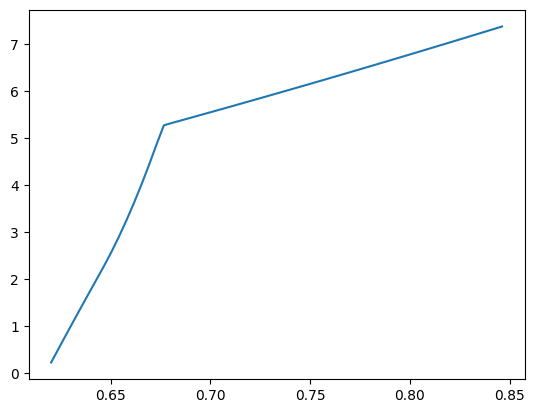

In [77]:
plt.plot(feasible_cl_des, m03)
plt.show()

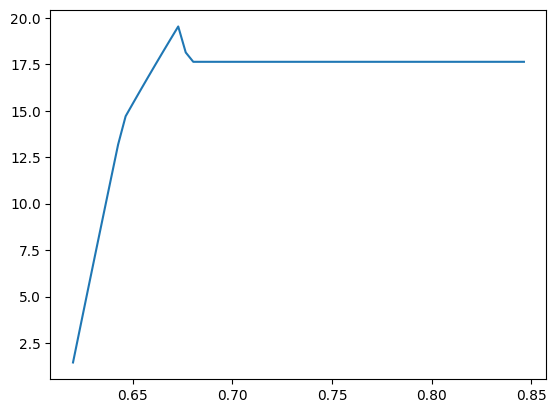

In [78]:
plt.plot(feasible_cl_des, m_pay)
plt.show()

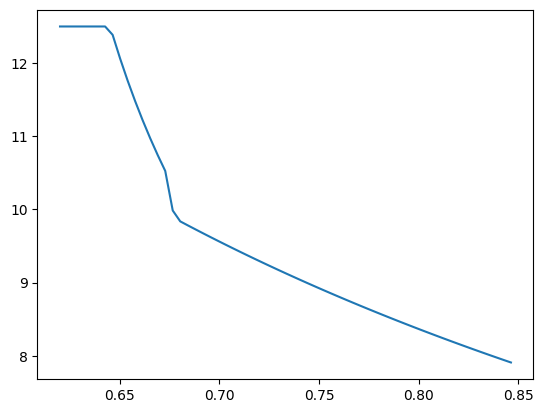

In [79]:
plt.plot(feasible_cl_des, R)
plt.show()

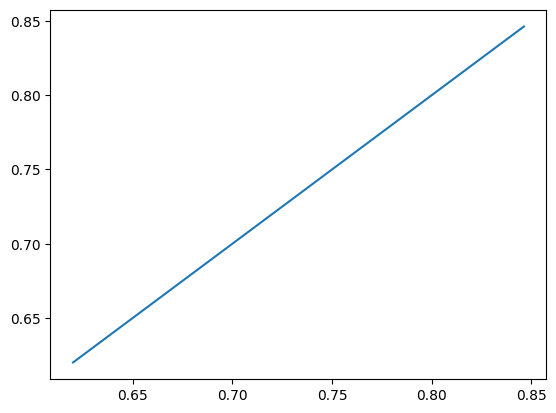

In [80]:
plt.plot(feasible_cl_des, CL)
plt.show()

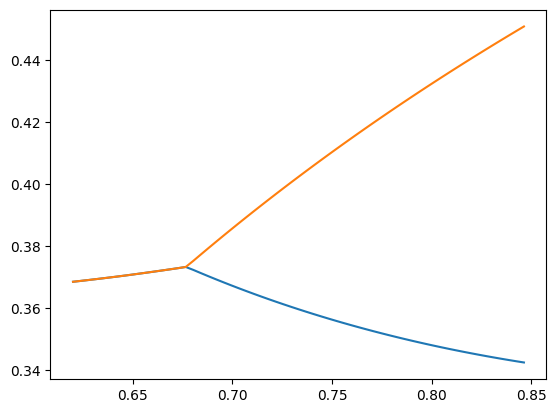

In [83]:
plt.plot(feasible_cl_des, T)
plt.plot(feasible_cl_des, T_max)
plt.show()

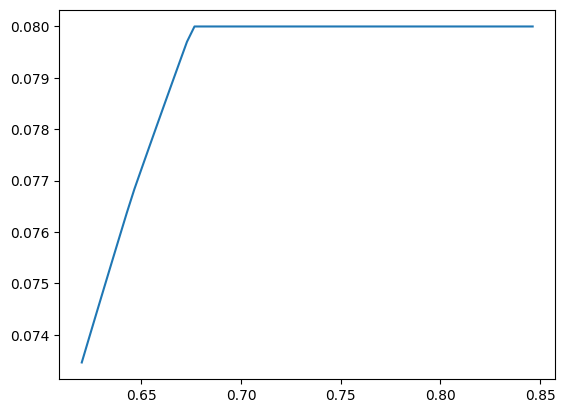

In [84]:
plt.plot(feasible_cl_des, db)
plt.show()

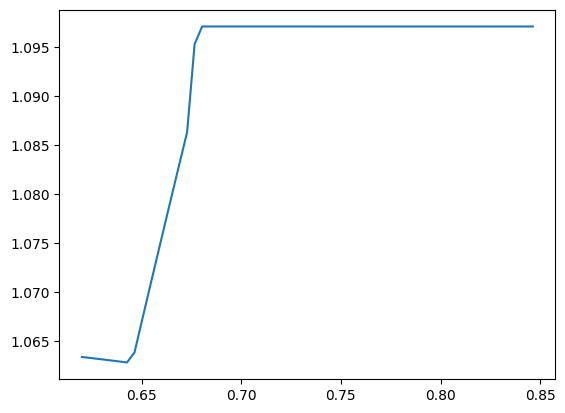

In [85]:
plt.plot(feasible_cl_des, N)
plt.show()